<a href="https://colab.research.google.com/github/sks95/Machine-Learning-Complete/blob/main/Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble

**Ask a complex question to thousands of random people, then aggregate
their answers. In many cases you will find that this aggregated answer is better than
an expert’s answer.**

A group of predictors is called an **ensemble**; thus, this technique is called **Ensemble Learning**, and an
Ensemble Learning algorithm is called an **Ensemble method**.

The most popular Ensemble methods, including 

*   Voting
    * Hard
    * Soft
*   bagging
    * Random Forest 
*   boosting
*   stacking
*   Cascading

We will also explore Random Forests.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#VotingClassifier

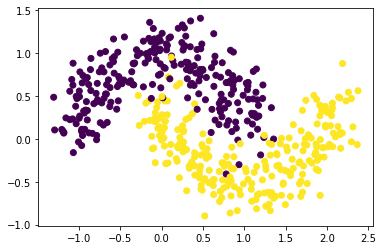

In [4]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=500, noise=0.2, shuffle=True)
plt.scatter(X[:,0], X[:,1], c=y)

In [5]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, y)

In [6]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((375, 2), (125, 2), (375,), (125,))

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

log = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
nb = GaussianNB()
svc = SVC()

# Hard
Majority Vote

In [8]:
from sklearn.ensemble import VotingClassifier

vot = VotingClassifier([
                        ('logistic', log),
                        ('neighbour', knn),
                        ('tree', dt),
                        ('nb', nb),
                        ('svc', svc)
], n_jobs = -1)

In [9]:
vot.fit(X,y)
vot.score(X, y)

0.976

In [10]:
base = [log, knn, dt, nb, svc, vot]

for model in base:
    model.fit(xtrain, ytrain)
    sc = model.score(xtest, ytest)
    print(model.__class__.__name__, sc)

LogisticRegression 0.88
KNeighborsClassifier 0.976
DecisionTreeClassifier 0.968
GaussianNB 0.88
SVC 0.976
VotingClassifier 0.96


# Soft 
Probability

In [11]:
from sklearn.ensemble import VotingClassifier

vot = VotingClassifier([
                        ('logistic', log),
                        ('neighbour', knn),
                        ('tree', dt),
                        ('naives', nb),
                        ('svm', SVC(probability=True))
], n_jobs=-1, voting='soft')

In [12]:
base = [log, knn, dt, nb, svc, vot]

for model in base:
    model.fit(xtrain, ytrain)
    sc = model.score(xtest, ytest)
    print(model.__class__.__name__, sc)

LogisticRegression 0.88
KNeighborsClassifier 0.976
DecisionTreeClassifier 0.968
GaussianNB 0.88
SVC 0.976
VotingClassifier 0.976


# **Bagging and Pasting**

Above we saw base model's of very different training algorithms.

Another approach is to use the same training algorithm for every predictor, but to train them on different random subsets of the training set.

When sampling is performed with replacement, this method is called **bagging** (short for **bootstrap aggregating**), bagging does row sampling.

When sampling is performed without replacement, it is called **pasting**.

![image.png](https://raw.githubusercontent.com/aman5898/Pepcoding-Data-Science/main/Chapter%20Notes/7_Ensembler/assets/row_sampling.png)


## Generating Dataset


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Settings
n_repeat = 50  # Number of datasets
n_train = 50  # Size of the training set
n_test = 1000  # Size of the test set
noise = 0.1  # Standard deviation of the noise
np.random.seed(0)

# Generate data
def f(x):
    x = x.ravel()

    return np.exp(-(x**2)) + 1.5 * (np.exp(-(x-2) ** 2))

def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y

X_trains = []
y_trains = []

for i in range(n_repeat):
    X,y = generate(n_samples=n_train, noise=noise)
    X_trains.append(X)
    y_trains.append(y)

X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

In [4]:
len(X_trains), len(y_trains)

(50, 50)

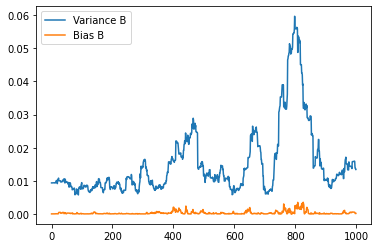

In [7]:
from sklearn.tree import DecisionTreeRegressor
MB = DecisionTreeRegressor()

y_pred = np.zeros((n_test, n_repeat))

for i in range(n_repeat):
    MB.fit(X_trains[i], y_trains[i])
    y_pred[:, i] = MB.predict(X_test)

varianceB = np.var(y_pred, axis = 1)
biasB = (f(X_test) - np.mean(y_pred, axis=1))**2

plt.plot(varianceB, label= 'Variance B')
plt.plot(biasB, label='Bias B')
plt.legend()
plt.show()

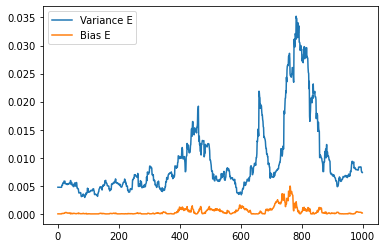

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

ME = BaggingRegressor()

y_pred = np.zeros((n_test, n_repeat))

for i in range(n_repeat):
    ME.fit(X_trains[i], y_trains[i])
    y_pred[:,i] = ME.predict(X_test)

varianceE = np.var(y_pred, axis = 1)
biasE = (f(X_test) - np.mean(y_pred, axis=1))**2

plt.plot(varianceE, label='Variance E')
plt.plot(biasE, label='Bias E')
plt.legend()
plt.show()

## **Reduces Variance**

**Variance** Model changes a lot with sampling DataSet.

In bagging changing a sub-set to test-instances only few models change and doesn't affect results much.

Bagging can reduce variance without change in bias.

bagging can combine **low bias high variance** models and convert them to **low bias reduced variance** model.

Example of low bias and high variance ALGO is DT.

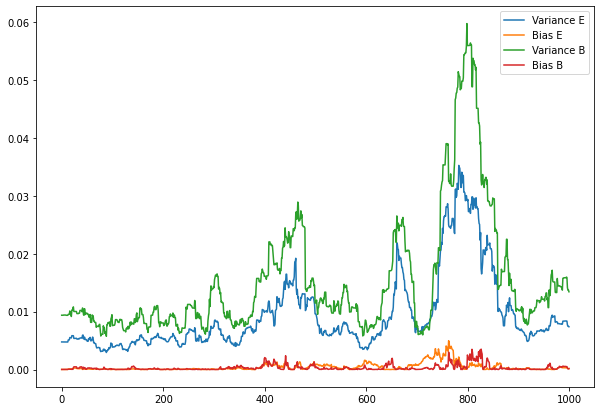

In [10]:
plt.figure(figsize=(10,7))

plt.plot(varianceE, label='Variance E')
plt.plot(biasE, label='Bias E')
plt.plot(varianceB, label='Variance B')
plt.plot(biasB, label='Bias B')
plt.legend()
plt.show()

  0%|          | 0/9 [00:00<?, ?it/s]

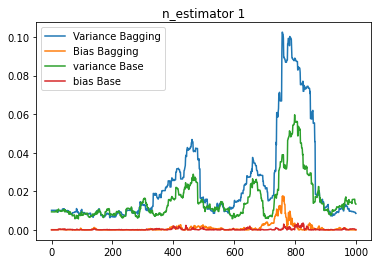

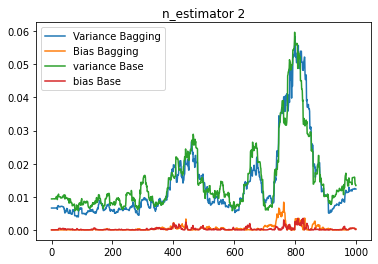

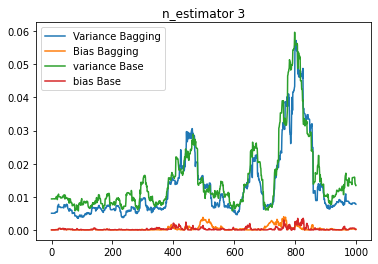

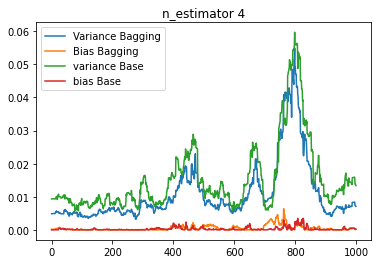

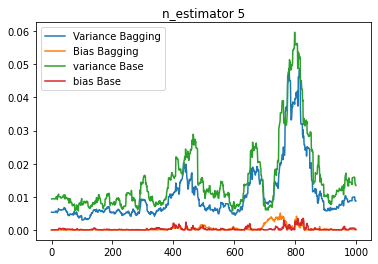

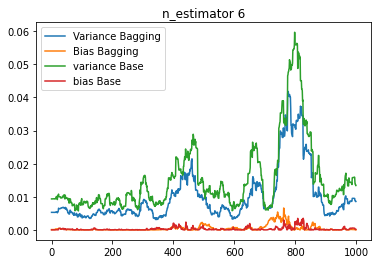

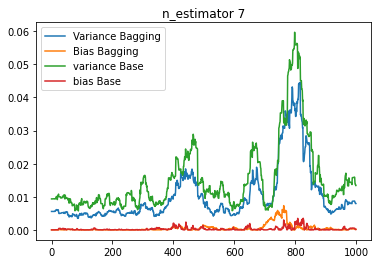

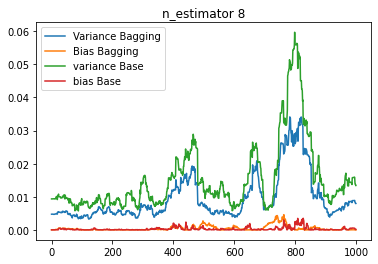

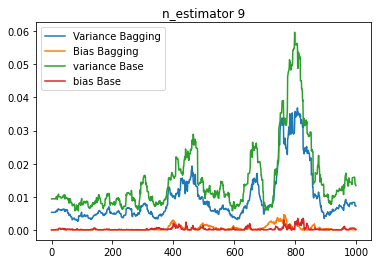

In [12]:
from tqdm.notebook import tqdm

for be in tqdm(range(1,10)):

    ME = BaggingRegressor(n_estimators=be, n_jobs=-1)

    y_pred = np.zeros((n_test, n_repeat))

    for i in range(n_repeat):
        ME.fit(X_trains[i], y_trains[i])
        y_pred[:, i] = ME.predict(X_test)

    varianceE = np.var(y_pred, axis=1)
    biasE = (f(X_test) - np.mean(y_pred, axis=1))**2

    plt.title('n_estimator {}'.format(be));
    plt.plot(varianceE, label='Variance Bagging')
    plt.plot(biasE, label='Bias Bagging')
    plt.plot(varianceB, label = 'variance Base')
    plt.plot(biasB, label = 'bias Base')
    plt.legend()
    plt.show()

# Pasting

`bootstrap = False`

sampling without replacement

# **Random Forest**

Random Forests = `DecisionTree + Bagging(row sampling) +  feature bagging(column sampling)`


A Random Forest is an **ensemble of Decision Trees**. Generally
trained via the bagging method (or sometimes pasting).

Random Forest is optimised for Decesion Tree than BaggingClassifier.

In [14]:
from sklearn.datasets import make_regression

features = 50
x_trains = np.zeros((50, n_train, features))
y_trains = np.zeros((50, n_train))

for i in enumerate(range(n_repeat)):
    X,y = make_regression(n_samples=n_train, n_features=features)
    x_trains[i, :, :] = X
    y_trains[i, :] = y

In [16]:
x_test, y_test = make_regression(n_samples=n_test, n_features=features)

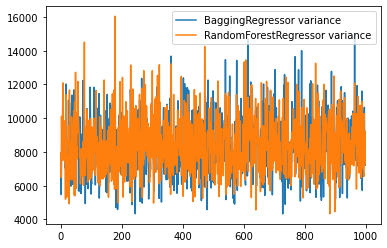

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

estimators = [
              BaggingRegressor(n_estimators=10, n_jobs=-1),
              RandomForestRegressor(n_estimators=10, n_jobs=-1)
]

def calBiasVar(model):
    y_pred = np.zeros( (x_test.shape[0], n_repeat) )

    for i in range(n_repeat):
        model.fit(x_trains[i], y_trains[i])
        y_pred[:, i] = model.predict(x_test)

    varianceE = np.var(y_pred, axis=1)
    biasE = (y_test - np.mean(y_pred, axis=1))**2

    plt.plot(varianceE, label=model.__class__.__name__ + ' variance')
    # plt.plot(biasE, label=model.__class__.__name__ + ' bias')

for model in estimators:
    calBiasVar(model)

plt.legend()
plt.show()

## **Extra-Trees**

ExtraTreesClassifier = `row_sampling + col_sampling + randomized_selection_TAU`

Because of **randomized_selection_TAU** variance is reduced even more than RandomForest.

Using **random thresholds** for each feature rather than searching for the best possible thresholds(like regular Decision Trees do) is simply called an **Extremely Randomized Trees** ensemble.

In [19]:
from sklearn.ensemble import ExtraTreesRegressor

# Adaboost

In [20]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

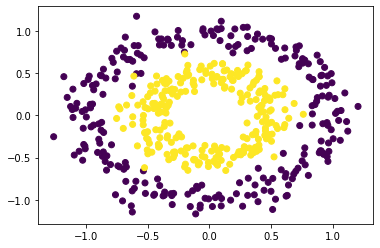

In [22]:
X, y = make_circles(n_samples = 500, noise = 0.1, factor = 0.5)

plt.scatter(X[:, 0], X[:, 1], c = y)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=1)

In [33]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [34]:
y_pred = tree.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
print("Testing Score: ", accuracy_score(tree.predict(X_test), y_test))
print("Training Score: ", accuracy_score(tree.predict(X_train), y_train))

Testing Score:  0.6133333333333333
Training Score:  0.6342857142857142


In [36]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()

adaboost.fit(X_train, y_train)

AdaBoostClassifier()

In [37]:
print('Testing Score: ', accuracy_score(adaboost.predict(X_test), y_test))
print('Training Score: ', accuracy_score(adaboost.predict(X_train), y_train))

Testing Score:  0.9733333333333334
Training Score:  1.0


# Stacking

Stacking takes multiple models as input like a stack 

In [38]:
from sklearn.ensemble import StackingRegressor

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

base_models = [
               ('Linear Leg', LinearRegression()),
               ('KNN', KNeighborsRegressor()),
               ('Decision Tree', DecisionTreeRegressor())
]

meta_model = SVR()

In [43]:
stacking = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

In [44]:
stacking.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('Linear Leg', LinearRegression()),
                              ('KNN', KNeighborsRegressor()),
                              ('Decision Tree', DecisionTreeRegressor())],
                  final_estimator=SVR())

In [45]:
from sklearn.metrics import mean_squared_error

mean_squared_error(stacking.predict(X_test), y_test)

0.009537990070534378